In [2]:
import pandas as pd
import os
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
def mta_to_df():
    filenames = os.listdir('mta')
    data = pd.DataFrame()

    for file in filenames:
        df = pd.read_csv('mta/' + file)
        data = pd.concat([data, df])
    return data

def clean_mta_df(df):
    new_df = df.copy()
    new_df.dropna(axis=1, how='all', inplace=True)
    col_names = ['area', 'unit', 'scp', 'station', 'linename', \
                 'division', 'date', 'time', 'desc', 'entries', 'exits']
    new_df.columns = col_names
    new_dt = new_df['date'] + ' ' + new_df['time']
    new_df['dt'] = pd.to_datetime(new_dt).dt.round('H')
    new_df['time'] = new_df['dt'].dt.hour
    
    return new_df

In [4]:
df = mta_to_df()
df = clean_mta_df(df)

In [5]:
# df.sample(10, random_state=1)
df.head(20)

# print('# of unique area:',len(df['area'].unique()))
# print('# of unique unit:', len(df['unit'].unique()))
# print('# of unique scp:', len(df['scp'].unique()))
# print('# of unique station:', len(df['station'].unique()))
# print('# of unique linename:', len(df['linename'].unique()))
# print('# of unique division:', len(df['division'].unique()))
# print('# of unique desc:', len(df['desc'].unique()))
# print('# of unique time:',len(df['time'].unique()))
# df['time']

,area,unit,scp,station,linename,division,date,time,desc,entries,exits,dt
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/14/2020,3,REGULAR,7488490,2548950,2020-11-14 03:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/14/2020,7,REGULAR,7488497,2548957,2020-11-14 07:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/14/2020,11,REGULAR,7488527,2549007,2020-11-14 11:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/14/2020,15,REGULAR,7488630,2549046,2020-11-14 15:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/14/2020,19,REGULAR,7488805,2549080,2020-11-14 19:00:00
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/14/2020,23,REGULAR,7488901,2549092,2020-11-14 23:00:00
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/15/2020,3,REGULAR,7488905,2549093,2020-11-15 03:00:00
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/15/2020,7,REGULAR,7488912,2549099,2020-11-15 07:00:00
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/15/2020,11,REGULAR,7488935,2549126,2020-11-15 11:00:00
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/15/2020,15,REGULAR,7488994,2549163,2020-11-15 15:00:00


In [22]:
# t = df[['station', 'time']].groupby('station').diff()
df[['station', 'unit', 'scp', 'date','time', 'entries']].head(100)
df[(df.station == '59 ST') & (df.scp == '00-03-02') & (df.date == '10/24/2020')].tail(10)

,area,unit,scp,station,linename,division,date,time,desc,entries,exits,dt,day,entries_hourly,exits_hourly,busyness
167068,R244,R050,00-03-02,59 ST,456NQRW,IRT,10/24/2020,8,REGULAR,3365648,6534217,2020-10-24 08:00:00,Saturday,9.00,96.00,105.00
167069,R244,R050,00-03-02,59 ST,456NQRW,IRT,10/24/2020,12,REGULAR,3365692,6534416,2020-10-24 12:00:00,Saturday,44.00,199.00,243.00
167070,R244,R050,00-03-02,59 ST,456NQRW,IRT,10/24/2020,16,REGULAR,3365760,6534567,2020-10-24 16:00:00,Saturday,68.00,151.00,219.00
167071,R244,R050,00-03-02,59 ST,456NQRW,IRT,10/24/2020,20,REGULAR,3365858,6534704,2020-10-24 20:00:00,Saturday,98.00,137.00,235.00
167654,R245,R051,00-03-02,59 ST,456NQRW,IRT,10/24/2020,0,REGULAR,1040891996,734939898,2020-10-24 00:00:00,Saturday,58.30,116.17,174.46
167655,R245,R051,00-03-02,59 ST,456NQRW,IRT,10/24/2020,4,REGULAR,1040891999,734939893,2020-10-24 04:00:00,Saturday,3.00,116.17,119.17
167656,R245,R051,00-03-02,59 ST,456NQRW,IRT,10/24/2020,8,REGULAR,1040892005,734939857,2020-10-24 08:00:00,Saturday,6.00,116.17,122.17
167657,R245,R051,00-03-02,59 ST,456NQRW,IRT,10/24/2020,12,REGULAR,1040892026,734939741,2020-10-24 12:00:00,Saturday,21.00,116.17,137.17
167658,R245,R051,00-03-02,59 ST,456NQRW,IRT,10/24/2020,16,REGULAR,1040892056,734939595,2020-10-24 16:00:00,Saturday,30.00,116.17,146.17
167659,R245,R051,00-03-02,59 ST,456NQRW,IRT,10/24/2020,20,REGULAR,1040892097,734939509,2020-10-24 20:00:00,Saturday,41.00,116.17,157.17


['Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday']
station  scp     
59 ST    00-03-02   225,757.29
Name: busyness, dtype: float64


<BarContainer object of 7 artists>

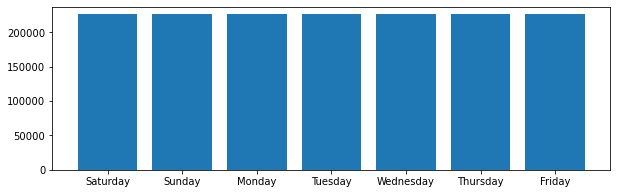

In [23]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#we need to graph Monday Tuesday Wednesday Thursday Friday Saturday Sunday on the x-axis, 
#and "busyness" on the y-axis (busyness = entries + exits) for one turnstile

#we define day (as Monday, Tuesday, this kind of format), entries_hourly, and exits_hourly

#we clean both to transform any values >20000 (some are like 2 million in 4 hours, makes no sense)
#back to the average value of the date (we do NOT remove them)

df['day'] = pd.to_datetime(df['dt']).dt.day_name()
df['entries_hourly'] = df.entries - df.entries.shift(1)
df['exits_hourly'] = df.exits - df.exits.shift(1)

#df['entries_hourly'].values[df['entries_hourly'].values > 20000] = df['entries_hourly'].mean()

#np.where documentation https://numpy.org/doc/stable/reference/generated/numpy.where.html
df['entries_hourly'] = df.entries_hourly.transform(lambda x: np.where(x>1000000, x.mask(x>1000000).mean(), x))
df['exits_hourly'] = df.exits_hourly.transform(lambda x: np.where(x>1000000, x.mask(x>1000000).mean(), x))
df['entries_hourly'] = df.entries_hourly.transform(lambda x: np.where(x<0, x.mask(x<0).mean(), x))
df['exits_hourly'] = df.exits_hourly.transform(lambda x: np.where(x<0, x.mask(x<0).mean(), x))

#we set equal to the mean disergarding all that also fulfill the x>1000000 condition using the mask method

#mask() function return an object of same shape as self and
#whose corresponding entries are from self where cond is False and otherwise are from other object
#The other object could be a scalar, series, dataframe or 
#could be a callable. The mask method is an application of the if-then idiom.

#define busyness as exits+entries

df['busyness'] = df.entries_hourly + df.exits_hourly

#consider only one turnstile from one station

df = df[(df.station == '59 ST')]

days = df['day'].unique()
print(days)

y_values = df.groupby(['station', 'scp']).sum()['busyness']

print(y_values)
#y_values = df.groupby(['STATION' == '59 ST']).sum()['busyness']
#y_values.head() 

#now we have to plot it...
plt.figure(figsize=(10,3))
plt.bar(days, df.groupby(['station']).sum()['busyness'])

In [24]:
station = df['station'].unique()
date = df['date'].unique()
time = df['time'].unique()
scp = df['scp'].unique()
# date, time, len(scp)

In [25]:
# df2 = df[['station', 'scp', 'date', 'time', 'entries', 'exits']]
# df2 = df[['station', 'scp', 'date', 'time', 'entries']]
df2 = df[['station', 'unit', 'scp', 'date', 'entries']]

g = df2.groupby(['station', 'unit', 'scp', 'date'], sort=False)
# we may need to sum up the # of entries for different units at a given station. see[out] 5
total_daily_entries = g.max('entries') - g.min('entries')
total_daily_entries

entries
station unit scp      date               
59 ST   R212 00-03-02 11/14/2020      372
                      11/15/2020      246
                      11/16/2020       10
                      11/17/2020      721
                      11/18/2020      897
                      11/19/2020      877
                      11/20/2020      793
        R050 00-03-02 11/14/2020      231
                      11/15/2020      148
                      11/16/2020      415
                      11/17/2020      446
                      11/18/2020      458
                      11/19/2020      448
                      11/20/2020      420
        R051 00-03-02 11/14/2020      134
                      11/15/2020       64
                      11/16/2020      104
                      11/17/2020      132
                      11/18/2020      140
                      11/19/2020      131
                      11/20/2020      108
        R212 00-03-02 12/12/2020      457
                      12/13/2020      339
                      12/14/2020      792
                      12/15/2020      836
                      12/16/2020      824
                      12/17/2020      529
                      12/18/2020      782
        R050 00-03-02 12/12/2020      219
                      12/13/2020      189
                      12/14/2020      378
                      12/15/2020      456
                      12/16/2020      360
                      12/17/2020      261
                      12/18/2020      456
        R051 00-03-02 12/12/2020      114
                      12/13/2020       82
                      12/14/2020       94
                      12/15/2020      125
                      12/16/2020      126
                      12/17/2020       80
                      12/18/2020        0
        R212 00-03-02 12/26/2020      333
                      12/27/2020      316
                      12/28/2020      753
                      12/29/2020      718
                      12/30/2020      763
                      12/31/2020      618
                      01/01/2021      229
        R050 00-03-02 12/26/2020      209
                      12/27/2020      162
                      12/28/2020      409
                      12/29/2020      397
                      12/30/2020      418
                      12/31/2020      303
                      01/01/2021      114
        R051 00-03-02 12/26/2020      101
                      12/27/2020       78
                      12/28/2020      160
                      12/29/2020      162
                      12/30/2020      174
                      12/31/2020       94
                      01/01/2021       62
        R212 00-03-02 12/19/2020      511
                      12/20/2020      435
                      12/21/2020      882
                      12/22/2020      783
                      12/23/2020      831
                      12/24/2020      610
                      12/25/2020      214
        R050 00-03-02 12/19/2020      289
                      12/20/2020      162
                      12/21/2020      414
                      12/22/2020      437
                      12/23/2020      439
                      12/24/2020      264
                      12/25/2020       49
        R051 00-03-02 12/19/2020      117
                      12/20/2020       77
                      12/21/2020      140
                      12/22/2020      135
                      12/23/2020      166
                      12/24/2020       97
                      12/25/2020       31
        R212 00-03-02 10/24/2020      229
                      10/25/2020      164
                      10/26/2020      454
                      10/27/2020      577
                      10/28/2020      581
                      10/29/2020      601
                      10/30/2020      640
        R050 00-03-02 10/24/2020      220
                      10/25/2020      145
                      10/26/2020      362
  

In [19]:
t = total_daily_entries['entries'].unstack()

# t.index[0][1]
# t
# t.iloc[0, 1]

### List of things to do:
* convert entries/exits from cumulative to number per hour
* make histograms to get an idea of which stations are the most promising at which times